## CoT Mid-Year Report

In [32]:
import os
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import scipy.stats as scs

import sklearn as sk
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV

import statsmodels as smm
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

import pygam
from pygam import LinearGAM
from pygam import s,l,f,te

In [18]:
date_col = ["Timestamp"]
df=pd.read_csv('CMU Data.csv',index_col = "Timestamp")

In [19]:
def plotMissing(df,save=False,title='Missing Values'):
    #Missing value plot
    plt.figure(figsize=(16,12))
    sns.heatmap(df.isnull(),cbar=False)
    #sns.heatmap(df.iloc[np.unique(np.where(df.isnull())[0]),:].isnull(),cbar=False)
    plt.title('Missing Value')
    plt.tight_layout()
    if save:
        plt.savefig(title,dpi=300)
    plt.show()

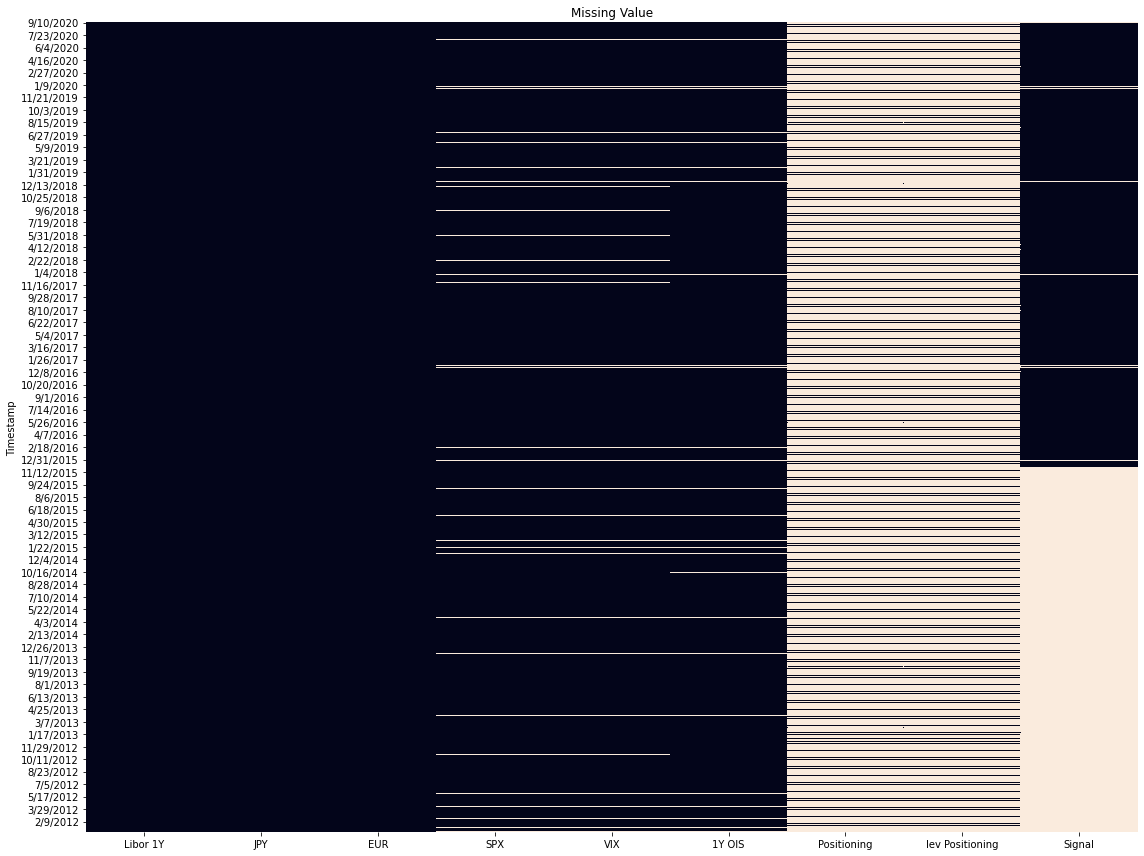

In [20]:
plotMissing(df)

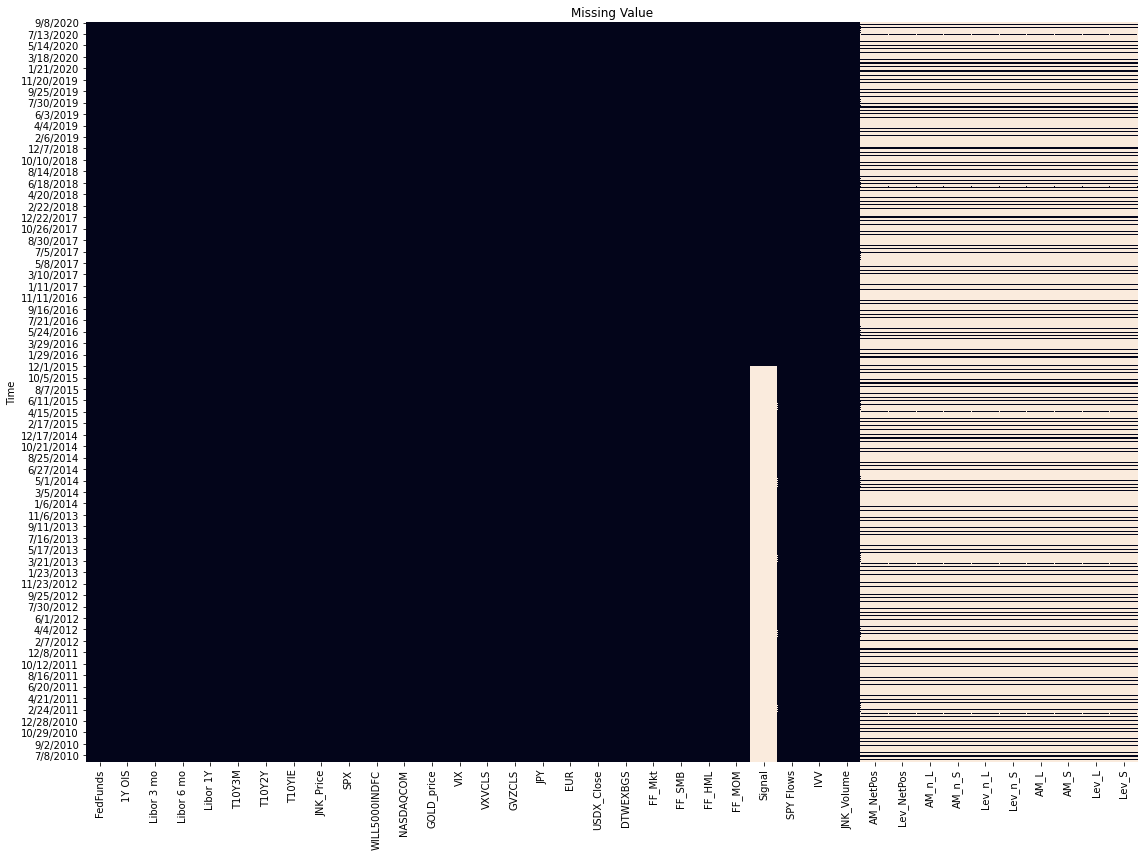

In [21]:
df=pd.read_csv('20201029_ScrubbedDailyRaw.csv',index_col = "Time")
plotMissing(df)

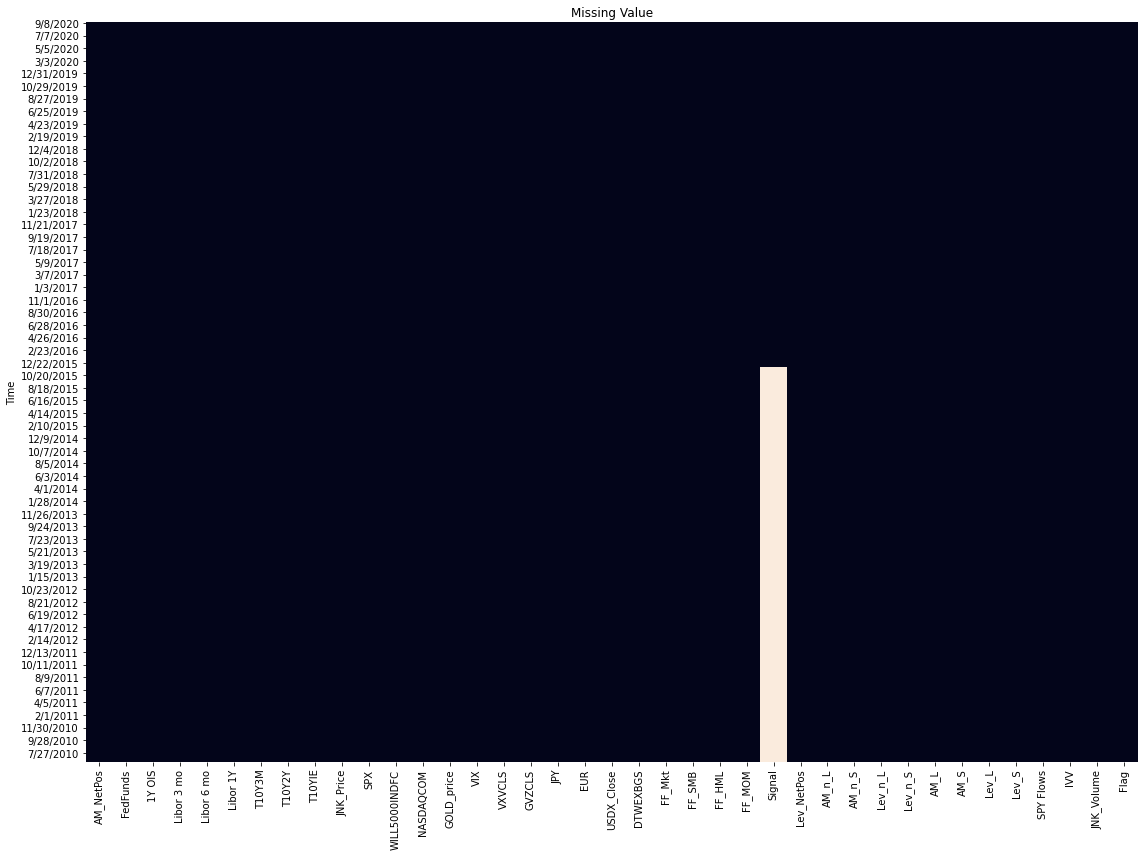

In [22]:
df=pd.read_csv('20201029_ScrubbedWeekly_Returns.csv',index_col = "Time")
plotMissing(df)

In [23]:
#Correlation: Compute the correlation matrix
def plotCorr(labeled,save=False):
    s=10
    corr = labeled.iloc[:,:-1].corr()

    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True

    #sns.set_theme(style="white")
    f, ax = plt.subplots(figsize=(16, 16))
    ax = sns.heatmap(corr, square=True,linewidths=.4,annot=True,annot_kws={"size":8},fmt='.1f',cbar_kws={"shrink": .4}, mask=mask, cmap="coolwarm")
    # Draw the heatmap with the mask and correct aspect ratio
    plt.tight_layout()
    plt.title('Correlation Matrix',size=s)
    if save:
        plt.savefig('Correlation Matrix',dpi=300)
    plt.show()

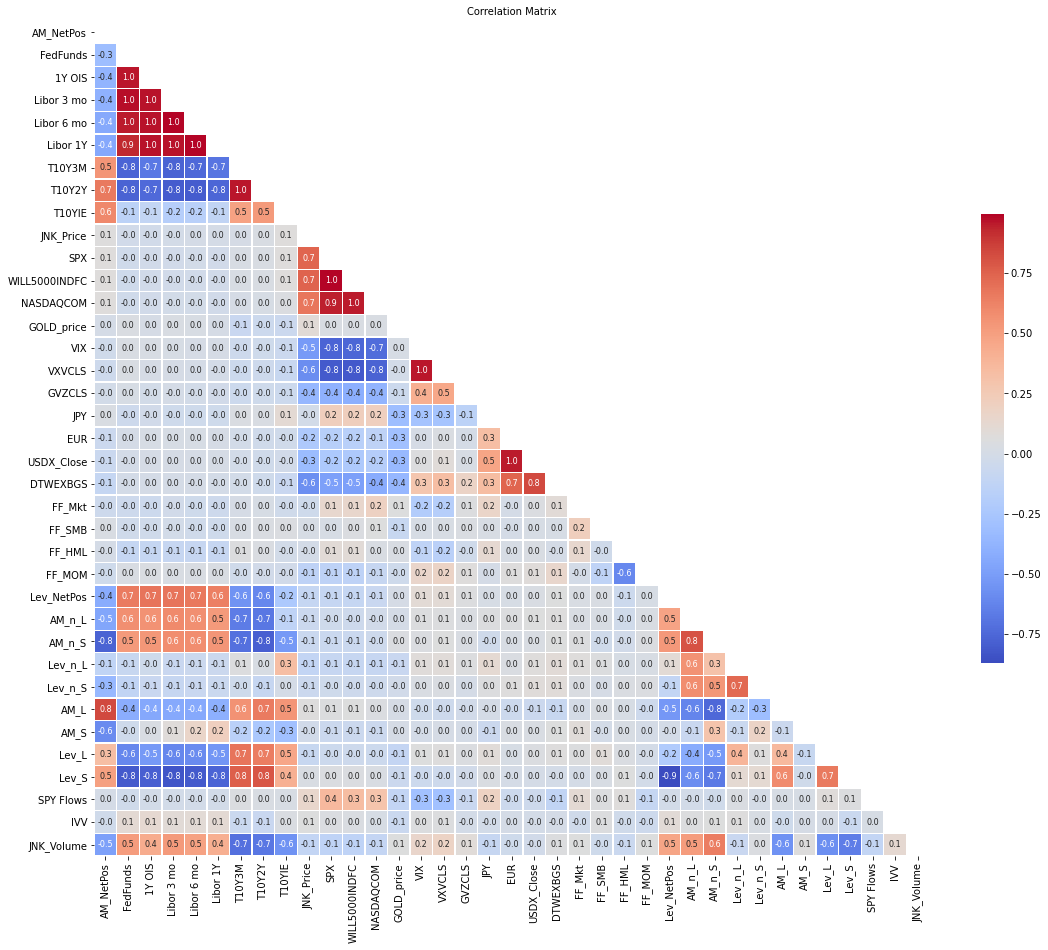

In [24]:
labeled=df.drop(labels='Signal',axis=1).dropna()
plotCorr(labeled,save=False)

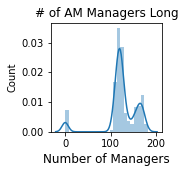

In [26]:
plt.figure(figsize = [2,2])
sns.distplot(df["AM_n_L"])
plt.xlabel("Number of Managers", size = 12)
plt.ylabel("Count")
plt.title("# of AM Managers Long", size = 12)
plt.show()

In [27]:
plt.figure(figsize = [2,2])
sns.displot(df["AM_n_S"])
plt.xlabel("Number of Managers", size = 12)
plt.ylabel("Count")
plt.title("# of AM Managers Short", size = 12)
plt.show()

AttributeError: module 'seaborn' has no attribute 'displot'

<Figure size 144x144 with 0 Axes>

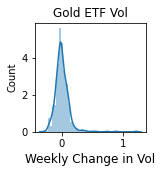

In [29]:
plt.figure(figsize = [2,2])
sns.distplot(df["GVZCLS"])
plt.xlabel("Weekly Change in Vol", size = 12)
plt.ylabel("Count")
plt.title("Gold ETF Vol", size = 12)
plt.show()

In [30]:
train=pd.read_csv('train_weekly.csv',index_col = "Time")
test = pd.read_csv('test_weekly.csv',index_col = "Time")
train = train.iloc[:,1:]
X_train = train.iloc[:,1:].values
y_train = train.iloc[:,0]
test = test.iloc[:,1:]
X_test = test.iloc[:,1:].values
y_test = test.iloc[:,0]


In [7]:
train.head()

,AM_NetPos,FedFunds,1Y OIS,Libor 3 mo,Libor 6 mo,Libor 1Y,T10Y3M,T10Y2Y,T10YIE,JNK_Price,...,Lev_n_L,Lev_n_S,AM_L,AM_S,Lev_L,Lev_S,SPY Flows,IVV,JNK_Volume,Flag
Time,,,,,,,,,,,,,,,,,,,,,
2010-06-15,263511,0.0019,0.003350,0.00539,0.00755,0.011916,0.0323,0.0253,0.0200,0.027561,...,0,7,418437,154926,87605,196656,10521.781,426.9304,610260,2
2010-06-22,276099,0.0018,0.003070,0.00538,0.00747,0.011750,0.0305,0.0247,0.0198,0.012095,...,4,7,428055,151956,70878,182244,-3168.379,195.4229,704400,3
2010-06-29,258436,0.0015,0.002915,0.00533,0.00751,0.011744,0.0282,0.0236,0.0183,-0.012211,...,5,6,436268,177832,77655,184364,-4424.687,50.6436,522060,4
2010-07-06,256737,0.0018,0.002850,0.00531,0.00742,0.011631,0.0278,0.0233,0.0169,0.012721,...,5,6,439698,182961,75033,203822,-10835.682,-439.0648,821100,5
2010-07-13,280271,0.0017,0.002760,0.00526,0.00733,0.011450,0.0300,0.0248,0.0187,0.019381,...,5,6,436647,156376,72289,218281,4171.167,315.4354,901860,6
